# kwH  Data  Prep

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./kwh.csv')
df['date'] = pd.to_datetime(df['date'])
df['hour'] = df['date'].dt.hour
df['day'] = df['date'].dt.day
df['week'] = df['date'].dt.weekofyear
df['year'] = df['date'].dt.year
df['key'] = df['device_id']

devices = pd.read_csv("./device.csv")
devices['tag_site_type'] = devices['tag_site_type'].fillna('')
devices['tag_size'] = devices['tag_size'].fillna('')
devices['is_active'] = devices['is_active'].apply(lambda x : 1 if x else 0)
devices['key'] = devices['id']
df = pd.merge(df, devices, on = 'key')

df = df[~df['latitude'].isna()]
del df['device_id_x'], df['id_x'], df['key'], df['device_id_y'], df['id_y'], df['project'], df['system_name'], df['distributer_name'], df['tag_site_type'], df['tag_size'], df['device_unique_name'], df['date']

cdf = pd.read_csv("./wiki_country_kwh.tsv", sep = "\t")
df['country'] = df['country'].str.lower().str.strip()
cdf['country'] = cdf['country'].str.lower().str.strip()
df = pd.merge(df, cdf, on = 'country')
del df['id'], df['country'], df['year_of_data'], df['source'], df['population'], df['as_of']
df['kwh_per_year'] = pd.to_numeric(df['kwh_per_year'].apply(lambda x : float(x.replace(",", ""))))
df['average_energy_per_capita'] = pd.to_numeric(df['average_energy_per_capita'].apply(lambda x : float(x.replace(",", ""))))
df['watts_per_person'] = pd.to_numeric(df['watts_per_person'].apply(lambda x : float(x.replace(",", ""))))

df.sample(frac = 1).tail(20)

,metric,hour,day,week,year,is_active,sqm,latitude,longitude,kwh_per_year,average_energy_per_capita,watts_per_person
153335,37,13,11,32,2017,1,400,44.573752,10.984388,2.910000e+11,4692.0,535.0
1845,40,9,21,25,2017,1,2000,45.533914,11.506464,2.910000e+11,4692.0,535.0
154268,51,12,19,38,2017,1,400,44.573752,10.984388,2.910000e+11,4692.0,535.0
35401,32,22,3,5,2018,1,750,41.914647,12.386941,2.910000e+11,4692.0,535.0
69881,42,0,8,32,2017,1,4300,43.835463,11.159631,2.910000e+11,4692.0,535.0
8480,14,15,8,14,2018,1,2000,45.533914,11.506464,2.910000e+11,4692.0,535.0
9435,15,2,26,17,2017,1,910,41.809736,12.300885,2.910000e+11,4692.0,535.0
5671,13,1,12,50,2017,1,2000,45.533914,11.506464,2.910000e+11,4692.0,535.0
107874,280,19,8,27,2017,1,6000,41.900637,12.503831,2.910000e+11,4692.0,535.0
23472,20,22,3,40,2017,1,700,45.762729,9.056665,2.910000e+11,4692.0,535.0


In [2]:
import seaborn as sns
cm = sns.light_palette("green", as_cmap=True)
s = df.corr().style.background_gradient(cmap=cm)
s

/home/ubuntu/test/lib/python3.5/site-packages/matplotlib/colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


,metric,hour,day,week,year,is_active,sqm,latitude,longitude,kwh_per_year,average_energy_per_capita,watts_per_person
metric,1,0.157842,0.00272508,-0.00559457,-0.0177216,nan,0.604355,-0.267016,0.0933493,nan,nan,nan
hour,0.157842,1,-7.99605e-05,0.00324103,-0.00446724,nan,-0.000470112,-0.012013,0.00551308,nan,nan,nan
day,0.00272508,-7.99605e-05,1,0.116195,-0.0412366,nan,-0.0021141,-0.000603317,-0.00181009,nan,nan,nan
week,-0.00559457,0.00324103,0.116195,1,-0.72369,nan,-0.0478853,0.0340299,-0.0414864,nan,nan,nan
year,-0.0177216,-0.00446724,-0.0412366,-0.72369,1,nan,0.0769343,-0.0642579,0.0892538,nan,nan,nan
is_active,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
sqm,0.604355,-0.000470112,-0.0021141,-0.0478853,0.0769343,nan,1,-0.246941,0.108161,nan,nan,nan
latitude,-0.267016,-0.012013,-0.000603317,0.0340299,-0.0642579,nan,-0.246941,1,-0.544403,nan,nan,nan
longitude,0.0933493,0.00551308,-0.00181009,-0.0414864,0.0892538,nan,0.108161,-0.544403,1,nan,nan,nan
kwh_per_year,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


/home/ubuntu/test/lib/python3.5/site-packages/matplotlib/axes/_base.py:3124: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  'left=%s, right=%s') % (left, right))
/home/ubuntu/test/lib/python3.5/site-packages/matplotlib/axes/_base.py:3124: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=291000000000.0, right=291000000000.0
  'left=%s, right=%s') % (left, right))
/home/ubuntu/test/lib/python3.5/site-packages/matplotlib/axes/_base.py:3124: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=4692.0, right=4692.0
  'left=%s, right=%s') % (left, right))
/home/ubuntu/test/lib/python3.5/site-packages/matplotlib/axes/_base.py:3124: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=535.0, right=535.0


/home/ubuntu/test/lib/python3.5/site-packages/matplotlib/axes/_base.py:3124: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=535.0, right=535.0
  'left=%s, right=%s') % (left, right))
/home/ubuntu/test/lib/python3.5/site-packages/matplotlib/axes/_base.py:3443: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  'bottom=%s, top=%s') % (bottom, top))
/home/ubuntu/test/lib/python3.5/site-packages/matplotlib/axes/_base.py:3124: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  'left=%s, right=%s') % (left, right))
/home/ubuntu/test/lib/python3.5/site-packages/matplotlib/axes/_base.py:3124: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=291000000000.0, right=291000000000.0
  'lef

/home/ubuntu/test/lib/python3.5/site-packages/matplotlib/axes/_base.py:3443: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=4692.0, top=4692.0
  'bottom=%s, top=%s') % (bottom, top))
/home/ubuntu/test/lib/python3.5/site-packages/matplotlib/axes/_base.py:3443: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=4692.0, top=4692.0
  'bottom=%s, top=%s') % (bottom, top))
/home/ubuntu/test/lib/python3.5/site-packages/matplotlib/axes/_base.py:3443: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=4692.0, top=4692.0
  'bottom=%s, top=%s') % (bottom, top))
/home/ubuntu/test/lib/python3.5/site-packages/matplotlib/axes/_base.py:3124: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  'left=%s, ri

<Figure size 1440x1440 with 0 Axes>

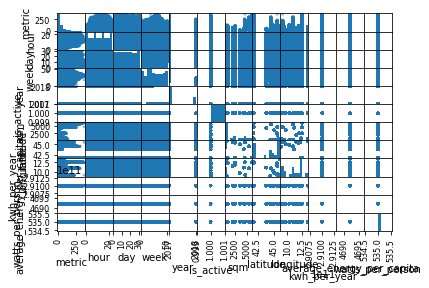

In [3]:
plt.figure(figsize = (20, 20))
from pandas.plotting import scatter_matrix
scatter_matrix(df)
plt.show()

In [4]:
train = df[['hour', 'day', 'week', 'sqm', 'latitude', 'longitude', 'year']]
test = df.metric
df[['hour', 'day', 'week', 'sqm', 'latitude', 'longitude', 'metric', 'year']].to_csv("./train.csv")